In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv')
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(184224, 32)

In [3]:
df.head()

,br,causa_acidente,classificacao_acidente,condicao_metereologica,delegacia,dia_semana,fase_dia,feridos,feridos_graves,feridos_leves,...,tracado_via,uf,uop,uso_solo,veiculos,hora,ano,mes,dia,target
0,376.0,Fenômenos da Natureza ...,Com Vítimas Feridas,Chuva,DEL7/7,domingo,Plena Noite,1,1,0,...,Reta,PR,UOP05/PR,Não,1,0,2017,1,1,1
1,101.0,Falta de Atenção à Condução ...,Sem Vítimas,Chuva,DEL8/1,domingo,Plena Noite,0,0,0,...,Curva,SC,UOP02/SC,Não,1,0,2017,1,1,0
2,153.0,Animais na Pista ...,Com Vítimas Feridas,Garoa/Chuvisco,DEL7/7,domingo,Plena Noite,2,0,2,...,Reta,PR,UOP07/PR,Não,1,0,2017,1,1,1
3,153.0,Avarias e/ou desgaste excessivo no pneu ...,Com Vítimas Feridas,Céu Claro,DEL1/2,domingo,Plena Noite,1,1,0,...,Reta,GO,UOP01/GO,Sim,1,0,2017,1,1,1
4,280.0,Ingestão de Álcool ...,Com Vítimas Feridas,Chuva,DEL8/6,domingo,Plena Noite,1,0,1,...,Não Informado,SC,UOP03/SC,Não,1,0,2017,1,1,1


In [4]:
df.target.value_counts()

1    108520
0     65167
2     10537
Name: target, dtype: int64

In [5]:
dd = df[['dia_semana', 'br', 'km', 'regional', 'causa_acidente', 
        'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'target']]
dd.dropna(inplace=True)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_PCA = pca.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

In [9]:
model_class0 = joblib.load('../model/model_v10-no-victms.pkl')
model_class1 = joblib.load('../model/model_v10-injuried-victims.pkl')
model_class2 = joblib.load('../model/model_v10-dead-victims.pkl')

In [15]:
y_predict_class0 = model_class0.predict_proba(X_test)
y_predict_class1 = model_class1.predict_proba(X_test)
y_predict_class2 = model_class2.predict_proba(X_test)

In [126]:
df_predict = pd.DataFrame({
    'y_test': y_test, 
    'y_class0': y_predict_class0[:,1],
    'y_class1': y_predict_class1[:,1],
    'y_class2': y_predict_class2[:,1],
})

In [134]:
def find_max_class(line):
    results = [line['y_class0'], line['y_class1'], line['y_class2']]
    if line['y_class2'] >= 0.75:
        return 2
    if line['y_class0'] >= 0.6:
        return 0
    return 1

In [135]:
y_pred = df_predict.apply(find_max_class, axis=1)

In [136]:
df_predict['y_pred_final'] = y_pred


In [137]:
df_predict.head(20)

,y_class0,y_class1,y_class2,y_test,y_pred_final
39513,0.280647,0.781428,0.828849,1,2
54561,0.428519,0.636261,0.372469,1,1
83666,0.443462,0.452040,0.553477,1,1
36560,0.624398,0.446587,0.338033,0,0
23084,0.254053,0.512768,0.664246,0,1
81657,0.250381,0.589873,0.713928,1,1
15397,0.477641,0.599624,0.251199,1,1
84512,0.414522,0.595664,0.493941,0,1
23851,0.340768,0.641337,0.600755,0,1
48987,0.822982,0.215345,0.870086,1,2


In [139]:
accuracy_score(y_test, y_pred)

0.4942657342657343

Confusion matrix, without normalization
[[1409 3598 1217]
 [1468 7228 1918]
 [ 126  713  198]]


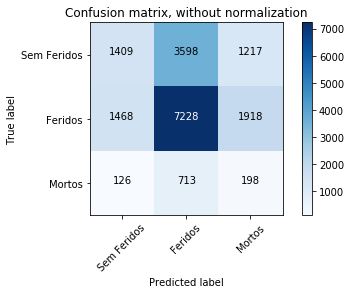

In [138]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [140]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))
print('----')

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))
print('----')

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.29384775808133473
Recall classe de sem vítimas:  0.22638174807197944
F1 classe de sem vítimas:  0.12787004265359833
----
Precision classe de feridos:  0.6263974347863767
Recall classe de feridos:  0.6809873751648766
F1 classe de feridos:  0.3262763508328443
----
Precision classe de mortos:  0.0594059405940594
Recall classe de mortos:  0.1909353905496625
F1 classe de mortos:  0.04530892448512585
